# ML and Data Science Survey from August 7th to August 25th 2021. 

In this project, you are a data journalist for a renowned publication. Your editor in chief has given
you access to a database that addresses a range of topics. You will be writing a 500 to
800-word article about the topic of your choosing.

In [1]:
# install chart studio
!pip install chart_studio

# import chart studio
import chart_studio

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
mcr = pd.read_csv('multipleChoiceResponses.csv')#mrc multichoiceResponses
ffr=pd.read_csv('freeformResponses.csv')#frr-freeformResponses
cr=pd.read_csv('conversionRates.csv')#cr-conversionrates
schema=pd.read_csv('schema.csv')#schema


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (5,17,21,38,50) have mixed types.Specify dtype option on import or set low_memory=False.



In [3]:
username = 'otumanelson758' # your username
api_key = 'RemjumfItb0aSbWdC5pM' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [4]:
#preview the dataset for mrc multichoiceResponses
mcr.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
mcr.info()#get more info about our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [6]:
#import chart_studio.plotly as py


## 1.Lets get the gender distribution of the dataset.

In [7]:
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']
mcr['GenderSelect'] = np.where(mcr['GenderSelect'] == "Non-binary, genderqueer, or gender non-conforming",'Non-binary',
                             mcr['GenderSelect'])

gender = mcr['GenderSelect'].value_counts()
label = gender.index
size = gender.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(title='Gender Distribution')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [8]:
#py.plot(fig, filename = 'Gender Distribution ', auto_open=True)

### Check for Nationality Respondents Per Country

In [9]:

df = pd.DataFrame(mcr['Country'].value_counts())
df['country'] = df.index
df.columns = ['number', 'country']
df = df.reset_index().drop('index', axis=1)

data = [dict(
        type = 'choropleth',
        locations = df['country'],
        locationmode = 'country names',
        z = df['number'],
        text = df['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],
                      [0.5,"rgb(70, 100, 245)"],
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],
                      [1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) 
        ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'Survey Respondents')
)
       ]

layout = dict(
    title = 'The Nationality of Respondents',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator')
    )
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

In [10]:
#py.plot(fig, filename = 'The Nationality of Respondents ', auto_open=True)

In [11]:
mcr = mcr[(mcr['Age'] < 75) & (mcr['Age'] > 18)]

age = round(mcr['Age'].value_counts(normalize=True), 4)
trace = go.Bar(
    x=age.index,
    y=age.values,
    marker=dict(
        color = age.values,
        colorscale='Reds',
        showscale=True)
)

data = [trace]
layout = go.Layout(title='Age distribution', 
                   yaxis = dict(title = '# of Respondents')
                  )

fig = go.Figure(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

In [12]:
#py.plot(fig, filename = 'Age distribution ', auto_open=True)

[-'https://plotly.com/~otumanelson758/15/'-]

In [13]:
train = mcr['FirstTrainingSelect'].value_counts()
label = train.index
size = train.values
colors = ['aqua', 'lightgrey', 'lightgreen', '#D0F9B1', 'khaki', 'grey']

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors)
              )

data = [trace]
layout = go.Layout(title='First Training Platform',
                   legend=dict(orientation="h")
                  )

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

The Online Courses are the major training platform for the data science, followed by University Courses.

- After learning basics of machine learning, people discover the people discover other ways of learning like Kaggle competitions, so although it is the last first learning platform in the above ranking, it is graded as the best learning platform.
- Online courses and Stack & Overflow are preferred to textbooks and university courses. Therefore this is the changing face of education in the 21st century!

### 3. Where do we Start and Continue in Data Science

In [14]:
course = mcr['CoursePlatformSelect'].str.split(',')
course_set = []

for i in course.dropna():
    course_set.extend(i)
courses = round(pd.Series(course_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending = False).to_frame()  

trace1 = go.Bar(
    x=courses.index,
    y=courses[0],
    name='course',
    marker=dict(
        color=courses[0],
        colorscale = "Jet"))

learning = mcr['LearningPlatformSelect'].str.split(',')
learning_set = []
for i in learning.dropna():
    learning_set.extend(i)
learn = round(pd.Series(learning_set).value_counts(normalize=True)[:5], 4).\
        sort_values(ascending = False).to_frame()  
trace2 = go.Bar(
    x=learn.index,
    y=learn[0],
    name='platform',
    marker=dict(
        color=learn[0],
        colorscale = "Jet")
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Course Platforms', 
                                                          'Learning Platforms'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(height=500, width=820, 
                     title='Where to start & How to continue in DS?', 
                     showlegend=False)                        
py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [15]:
#py.plot(fig, filename = 'Where to start & How to continue in DS?', auto_open=True)

[-'https://plotly.com/~otumanelson758/21/'-]

- The most learning platform is Kaggle, followed by online courses, Stack Overflow.
- Course platforms become Coursera, Udacity followed lastly by edX

## What is the best hardware for starting the DataScience Path.?

In [16]:
hardware = mcr['HardwarePersonalProjectsSelect'].str.split(',')
hardware_set = []
for i in hardware.dropna():
    hardware_set.extend(i)
    hware = pd.Series(hardware_set).value_counts()[:6] 
    
label = hware.index
size = hware.values

colors = ['#FEBFB3', 'skyblue', '#96D38C', '#D0F9B1', 'tan', 'lightgrey']

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors)
              )

data = [trace]
layout = go.Layout(
    title='Hardware Requirements', 
    legend=dict(orientation="h")
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [17]:
#py.plot(fig, filename = 'Hardware Requirements?', auto_open=True)

[--'https://plotly.com/~otumanelson758/25/']

From the above Pie Chart we need a basic laptop that can hold Azure as a software or even Laptop itself and + some of the Cloud Service

### 4. What is the Compensation Amount the Data Scientist World Wide?
+ This is a question one should consider before accepting any job offer. one needs to perform survey on the same.


In [18]:
mcr['CompensationAmount']=mcr['CompensationAmount'].str.replace(',','')
mcr['CompensationAmount']=mcr['CompensationAmount'].str.replace('-','')

salary=mcr[['CompensationAmount','CompensationCurrency','Country','JobSatisfaction',
            'CurrentJobTitleSelect', 'Age','GenderSelect']].dropna()

crates=pd.read_csv('conversionRates.csv')
crates.drop('Unnamed: 0', axis=1,inplace=True)
salary=salary.merge(crates, left_on='CompensationCurrency', right_on='originCountry', how='left')
salary['Salary']= pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']

us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                   (salary['Country'] == 'United States')]
non_us_salary = salary[(salary['Salary'] > 100) & (salary['Salary'] < 500000) & 
                       (~(salary['Country'] == 'United States'))]
sal_coun=salary.groupby('Country')['Salary'].median().round(-2).sort_values(ascending=False)[:16].\
                                    to_frame()

trace = go.Bar(
    x=sal_coun.index,
    y=sal_coun.Salary,
    marker=dict(
        color=sal_coun.Salary,
        colorscale = 'Reds')
)

data = [trace]
layout = go.Layout(
    title='Top Countries with Highest Median Salaries', 
    yaxis = dict(title = 'Salary ($)')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [19]:
#py.plot(fig, filename = 'Top Countries with Highest Median Salaries', auto_open=True)

[-'https://plotly.com/~otumanelson758/29/'-]

**The above shows the top Ten Well Paying Countries**
+ United states is the best paying country followed by,
+ Switzerland
+ Austrilia
+ Norway
+ Denmark
+ Israel
+ Netherlands
+ Germany
+ Canada
+ Ireland


The best way to learn is step by step and master the skills. One gets Hired because of his or her mastery skills.
Having a strong grasp of data means you can save time by not relying on others to pull data, make dashboards, automate simple tasks, and derive insights. Likewise, without the analytical skills to make data-driven decisions, it's very easy to make wrong decisions which are very costly in terms of time and money.


## 5. What is the Median Salary by Age in USA and Non USA Citizens?

In [20]:
us_group = us_salary.groupby('Age')['Salary'].median().to_frame()
non_us_group = non_us_salary.groupby('Age')['Salary'].median().to_frame()

trace0 = go.Scatter(
    x = us_group.index,
    y = us_group['Salary'].round(-2),
    name = 'US',
    mode='markers',
    marker=dict(
        size=9,
        color = ('aqua')))

trace1 = go.Scatter(
    x = non_us_group.index,
    y = non_us_group['Salary'].round(-2),
    name = 'non-US',
    mode='markers',
    marker=dict(
        size=9,
        color = ('navy')))

data = [trace0, trace1]
layout = dict(title = 'The Median Salary by Age in US and Non-US Countries',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', tickfont = dict(size = 12)))
py.iplot(fig)

In [21]:
#py.plot(fig, filename = 'The Median Salary by Age in US and Non-US Countries', auto_open=True)

[--'https://plotly.com/~otumanelson758/33/']

In [22]:
### Note Lets try check for correlations.
salary['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'0'
                                    ,'I prefer not to share':np.NaN},inplace=True)

salary.dropna(subset=['JobSatisfaction'], inplace=True)
salary['JobSatisfaction']=salary['JobSatisfaction'].astype(int)

In [23]:
salary_us = salary[salary.originCountry=='USD'].groupby('JobSatisfaction').Salary.mean().to_frame()
salary_non_us = salary[salary.originCountry!='USD'].groupby('JobSatisfaction').Salary.mean().to_frame()

trace0 = go.Scatter(
    x=salary_us.index,
    y=salary_us['Salary'].round(-2),
    name = 'US',
    mode='markers',
    marker=dict(size=11,
        color=('navy')
               )
)

trace1 = go.Scatter(
      x = salary_non_us.index,
    y = salary_non_us['Salary'].round(-2),
    name = 'non_US',
    mode='markers',
    marker=dict(size=11,
        color = ('aqua')
               )
)

data = [trace0, trace1]
layout = dict(title = 'The Median Salary & Satisfaction in US & non-US Countries',
              xaxis = dict(title = 'Job Satisfaction'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Job Satisfaction', 
                                   tickmode='linear',
                                   tickfont = dict(size = 10)))
py.iplot(fig)

In [24]:
#py.plot(fig, filename = 'The Median Salary by Age in US and Non-US Countries', auto_open=True)

[-'https://plotly.com/~otumanelson758/33/'-]

+ The USA has the high number of Job Satisfactory since the people earn more than the other non USA citizens.

***We now Combine the Age gap,Salary and Job Satisfactory***

In [25]:
salary = salary[salary.Salary<1000000]
dat = salary[['Age','JobSatisfaction','Salary']]
dat["index"] = np.arange(len(dat))
fig = ff.create_scatterplotmatrix(dat, diag='box', index='index',
                                  colormap_type='cat',colormap='Jet',
                                  height=800, width=800)
py.iplot(fig)

**We note that there is no gender inequality in terms of salary in data science all over the world.**
**People at the Age of 30-50 earns more cash.**


# 7.What is the Median Salary of Men and Women? Do they have any Correlationship.


In [26]:
male_salary = salary[salary['GenderSelect'] == 'Male']
female_salary = salary[salary['GenderSelect'] == 'Female']
male = male_salary.groupby('Age').Salary.mean().to_frame()
female = female_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male.index,
    y = male['Salary'].round(-2),
    name = 'male',
    line = dict(
        color = 'aqua',
        width = 2,
        dash='dash')
)

trace1 = go.Scatter(
      x = female.index,
    y = female['Salary'].round(-2),
    name = 'female',
    line = dict(
        color = 'navy',
        width = 2,
        dash = 'dash')
    )

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

In [27]:
#py.plot(fig, filename = 'The Median Salary of Men & Women by Age', auto_open=True)

[-'https://plotly.com/~otumanelson758/40/'-]

+ The median salary for Women at the Age of 49 seems to be high than that on Men, at the age of 72 they earn more than women. This means that Men have High Life Expectancy that women.

In [28]:
trace0 = go.Box(x=male_salary.Salary,name="Male",fillcolor='navy')
trace1 = go.Box(x=female_salary.Salary,name="Female",fillcolor='lime')
data = [trace0, trace1]
py.iplot(data)

In [29]:
#py.plot(fig, filename = 'The Median Salary of Men & Women by Age', auto_open=True)

[-'https://plotly.com/~otumanelson758/40/'-]

**Median wage of male is higher than median wage of female.**

In [30]:
male_us_salary = salary[(salary['GenderSelect'] == 'Male') & 
                        (salary.originCountry=='USD')]
male_non_us_salary = salary[(salary['GenderSelect'] == 'Male')& 
                        (salary.originCountry!='USD')]
female_us_salary = salary[(salary['GenderSelect'] == 'Female')& 
                        (salary.originCountry=='USD')]
female_non_us_salary = salary[(salary['GenderSelect'] == 'Female')& 
                        (salary.originCountry!='USD')]
male_us = male_us_salary.groupby('Age').Salary.mean().to_frame()
male_nus = male_non_us_salary.groupby('Age').Salary.mean().to_frame()
female_us = female_us_salary.groupby('Age').Salary.mean().to_frame()
female_nus = female_non_us_salary.groupby('Age').Salary.mean().to_frame()

trace0 = go.Scatter(
    x = male_us.index,
    y = male_us['Salary'].round(-2),
    name = 'male',
    mode='markers',
    marker=dict(
        size=8,
        color = ('grey')
    )
)

trace1 = go.Scatter(
      x = female_us.index,
    y = female_us['Salary'].round(-2),
    name = 'female',
    mode='markers',
    marker=dict(
        size=8,
        color = ('red')
    )
)

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age in US',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

trace0 = go.Scatter(
    x = male_nus.index,
    y = male_nus['Salary'].round(-2),
    name = 'male',
    mode='markers',
    marker=dict(
        size=8,
        color = ('grey')
    )
)

trace1 = go.Scatter(
      x = female_nus.index,
    y = female_nus['Salary'].round(-2),
    name = 'female',
    mode='markers',
    marker=dict(
        size=8,
        color = ('red')
    )
)

data = [trace0, trace1]
layout = dict(title = 'The Median Salary of Men & Women by Age in non-US countries',
              xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Salary ($)')
             )

fig = dict(data=data, layout=layout)
fig['layout']['xaxis'].update(dict(title = 'Age', 
                                   tickfont = dict(size = 12)))
py.iplot(fig)

In [31]:
#py.plot(fig, filename = 'The Median Salary of Men & Women by Age in non-US countries', auto_open=True)

[-'https://plotly.com/~otumanelson758/49/'-]

-Women are underpaid at the age of 35 and 60 in the USA, the non Citizens women are also underpaid at the age of 44.
-The male non citizens are underpaid at the age of 65.

### 8. What are the leading major subjects for Data Science and Machine Learning?

+ Consider the below
+ Lets compute and deduce our conclusion

In [32]:
mcr = mcr[~(mcr['MajorSelect'] == 'Other')]
mcr['MajorSelect'].replace({'Information technology, networking, or system administration':'IT, Network, System Admin', 
                      'Mathematics or statistics':'Math or stats',
                      'Engineering (non-computer focused)':'Engineering (non-CS)',
                      'IT, Network, System Admin':'IT-Network-System'}, inplace=True)

ms = round(mcr.MajorSelect.value_counts(normalize=True).to_frame()[:8], 4)
trace1 = go.Bar(
    x=ms.index,
    y=ms.MajorSelect,
    marker=dict(color='orange')
)

mcr['CurrentJobTitleSelect'].replace({'Software Developer/Software Engineer':'Software Developer', 
                      'Machine Learning Engineer':'ML Engineer'}, inplace=True)
cs = round(mcr.CurrentJobTitleSelect.value_counts(normalize=True).to_frame()[:8], 4)
trace2 = go.Bar(
    x=cs.index,
    y=cs.CurrentJobTitleSelect,
    marker=dict(color='navy')
)

fig = tools.make_subplots(rows=1, cols=2, subplot_titles=('Majors', 'Titles'))
fig.append_trace(trace1, 1,1)
fig.append_trace(trace2, 1,2)
fig['layout'].update(height=500, width=820, title='Majors & Titles in Data Science World', 
                     showlegend=False)            
py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [33]:
#py.plot(fig, filename = 'Majors', auto_open=True)
#py.plot(fig, filename = 'Titles', auto_open=True)

[-'https://plotly.com/~otumanelson758/55/'-]

**computer science, mathematics, statistics and engineering are leading degree majors in data science.**

### 8.a) What Does the Undergraduate Major in? ie. Software, Engineering, Data Science, Business Analysts?

In [34]:
#Consider the below.
def PieChart(column, title, limit):
    male = mcr[mcr['GenderSelect'] == 'Male']
    female = mcr[mcr['GenderSelect'] == 'Female']
    count_male = male[column].value_counts()[:limit].reset_index()
    count_female = female[column].value_counts()[:limit].reset_index()
    color = ['red',  'navy',  'cyan', 'lightgrey','orange', 'gold','lightgreen', 
                            '#D0F9B1','tomato', 'tan']
    
    trace1 = go.Pie(labels=count_male['index'], 
                    values=count_male[column], 
                    name= "male", 
                    hole= .5, 
                    domain= {'x': [0, .48]},
                   marker=dict(colors=color))

    trace2 = go.Pie(labels=count_female['index'], 
                    values=count_female[column], 
                    name="female", 
                    hole= .5,  
                    domain= {'x': [.52, 1]})

    layout = dict(title= title, font=dict(size=15), legend=dict(orientation="h"),
                  annotations = [
                      dict(
                          x=.20, y=.5,
                          text='Male', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.81, y=.5,
                          text='Female', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    py.iplot(fig)

In [35]:
PieChart('MajorSelect', "Undergraduate Major", 6)

In [36]:
#py.plot(fig, filename = 'Undergraduate Major', auto_open=True)

[--'https://plotly.com/~otumanelson758/59/']

* Most male and women major in Computer Science, Most women major in Maths or Stats,Most men major in Engineering (No -cs)

##### What about the Job Tiles ?

In [37]:
PieChart('CurrentJobTitleSelect', "Job Title", 6)

In [38]:
#py.plot(fig, filename = 'Job Title', auto_open=True)

[-'https://plotly.com/~otumanelson758/63/'-]

- A total of 1919 male and 326 women love Data Science.
- 1494 Male love Software Developer and 248 of the women like Data Analyst Job.

### 8.b) Between Machine Learning Engineers and Data Scientists who are highly paid?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



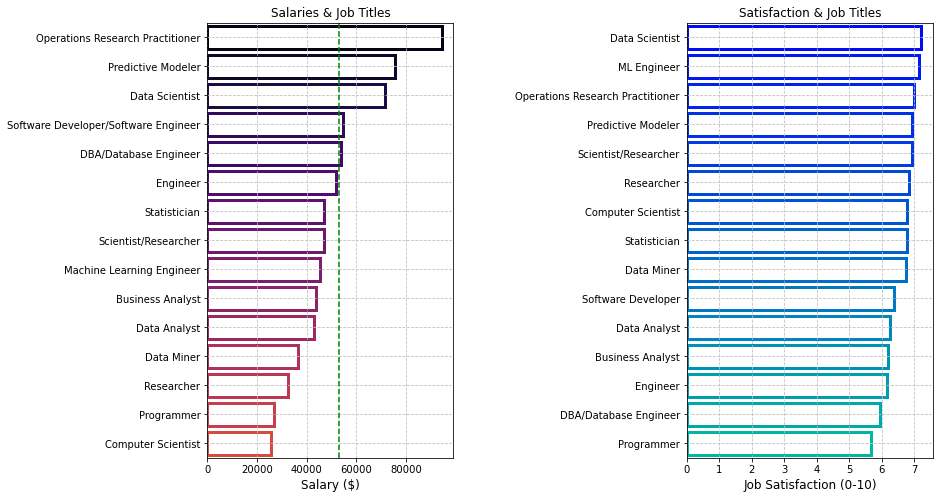

In [39]:
salary = salary[~(salary['CurrentJobTitleSelect'] == 'Other')]
mcr = mcr[~(mcr['CurrentJobTitleSelect'] == 'Other')]

f,ax=plt.subplots(1,2,figsize=(13, 8))
sal_job=salary.groupby('CurrentJobTitleSelect')['Salary'].median().to_frame().sort_values(by='Salary'
                                                         ,ascending=False)
sns.barplot(sal_job.Salary,sal_job.index,facecolor=(0, 0, 0, 0), linewidth=3, 
              edgecolor=sns.color_palette("inferno", 25), ax = ax[0])

ax[0].set_title("Salaries & Job Titles", fontsize=12)
ax[0].set_xlabel('Salary ($)', fontsize=12)
ax[0].set_ylabel('')
ax[0].axvline(salary['Salary'].median(),linestyle='dashed', color = "g")
ax[0].grid(color = 'silver',linestyle='--')

satisfy=mcr.copy()
satisfy['JobSatisfaction'].replace({'10 - Highly Satisfied':'10','1 - Highly Dissatisfied':'0'
                                    ,'I prefer not to share':np.NaN},inplace=True)
satisfy.dropna(subset=['JobSatisfaction'], inplace=True)
satisfy['JobSatisfaction']=satisfy['JobSatisfaction'].astype(int)
satisfy_job=satisfy.groupby(['CurrentJobTitleSelect'])['JobSatisfaction'].mean().sort_values(ascending=False).to_frame()
sns.barplot(y=satisfy_job.index, x=satisfy_job.JobSatisfaction,facecolor=(0, 0, 0, 0), linewidth=3, 
              edgecolor=sns.color_palette("winter", 20), ax = ax[1])

ax[1].set_title("Satisfaction & Job Titles", fontsize=12)
ax[1].set_xlabel('Job Satisfaction (0-10)', fontsize =12)
ax[1].set_ylabel('')
ax[1].grid(color = 'silver',linestyle='--')
plt.subplots_adjust(wspace=0.95)
plt.show()

In [40]:
#py.plot(fig, filename = 'Salaries & Job Titles', auto_open=True)
#py.plot(fig, filename = 'Satisfaction & Job Titles', auto_open=True)

[-'https://plotly.com/~otumanelson758/67/'-]

+ Operationas Research Practictioner, Predictive Modeler and Data Scientiest Salaries and Titles are High, on the other side Data Scientist,ML Engineer, Opertaional Research are ranked the top three Satisfaction and Job Titles.

### Employment Status

In [41]:
mcr['EmploymentStatus']=np.where(mcr['EmploymentStatus'] =='Independent contractor, freelancer, or self-employed',
                                                'Independent', mcr['EmploymentStatus'])
emp = mcr['EmploymentStatus'].value_counts().head(6)
labels = emp.index
sizes = emp.values

trace = go.Pie(labels=labels, 
               values=sizes, 
               marker=dict(colors=colors), 
               textposition = "inside")

data = [trace]
layout = go.Layout(
    title='Employment Status')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

tenure = mcr['Tenure'].value_counts()[:5].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=tenure.index,
    y=tenure.Tenure,
    marker=dict(
            color=tenure.Tenure.values,
        colorscale = 'Jet',
        reversescale = True))

data = [trace]
layout = go.Layout(title='Experience in Coding', yaxis = dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [42]:
#py.plot(fig, filename = 'Experience in Coding', auto_open=True)
#py.plot(fig, filename = 'Employment Status', auto_open=True)

**ratio of employees who have experience is coding is 1 to 2 and 3 to 5 years and high percentage is employed. 6 to 10 and more thab 10 years are the masters of coding.**

In [43]:
search = mcr['EmployerSearchMethod'].value_counts()
label = search.index
size = search.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors),
               textposition = "outside")

data = [trace]
layout = go.Layout(
    title='Job Search Method', 
    legend=dict(orientation="h"))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [44]:
#py.plot(fig, filename = 'Job Search Method', auto_open=True)

[-'https://plotly.com/~otumanelson758/75/'-]

+ Experience from work in company related to ML and Kaggle competitions seem most important way to prove knowledge in data science. Although 60% of respondents have master or doctoral degree, degree is not considered as proof of knowledge in data science.

In [45]:
educ = round(mcr['FormalEducation'].value_counts(normalize=True)[:5], 4).\
            sort_values(ascending = False).to_frame()  
as_list = educ.index.tolist()
idx = as_list.index("Some college/university study without earning a bachelor's degree")
as_list[idx] = 'University w/o degree'
educ.index = as_list

trace = go.Bar(
    x=educ.index,
    y=educ.FormalEducation,
    marker=dict(
        color=educ.FormalEducation.values,
        colorscale = 'Jet',
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Education Status', 
    yaxis = dict(title = '# of Respondents'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Edu")

PieChart('FormalEducation', "Education", 5)

proof = mcr['ProveKnowledgeSelect'].value_counts()
labels = proof.index
sizes= proof.values

trace = go.Pie(labels=labels, 
               values=sizes, 
               marker=dict(colors=colors), 
               textposition = "inside")

data = [trace]
layout = go.Layout(
    title='Proof of Knowledge')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [46]:
#py.plot(fig, filename = 'Proof of Knowledge', auto_open=True)
#py.plot(fig, filename = 'Education Status', auto_open=True)

[-'https://plotly.com/~otumanelson758/85/'-]

+ Github portfolio and certificates of online courses are even graded better than master and doctoral degree. But it is important to keep in mind that most respondents are employees, not employers.

### Challenges in Data Science?


In [47]:
challenge = mcr['WorkChallengesSelect'].str.split(',')
challenge_set = []

for i in challenge.dropna():
    challenge_set.extend(i)
challenges = pd.Series(challenge_set).value_counts()[:5]

label = (np.array(challenges.index))
size = challenges.values

trace = go.Pie(labels=label, 
               values=size, 
               marker=dict(colors=colors))

data = [trace]
layout = go.Layout(
    title='Challenges in Data Science', 
    legend=dict(orientation="h"))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### What are the two powerful tools in Data Science and ML?

In [48]:
mcr=mcr.dropna(subset=['WorkToolsSelect'])
Python=mcr[(mcr['WorkToolsSelect'].str.contains('Python'))&(~mcr['WorkToolsSelect'].str.contains('R'))]
R=mcr[(~mcr['WorkToolsSelect'].str.contains('Python'))&(mcr['WorkToolsSelect'].str.contains('R'))]

colors = ['cyan', 'gold', 'bisque', '#D0F9B1', 'tan', 'lightgrey', 'lightblue', 'lightgreen', 'c', 
          'wheat', 'tomato', 'y', 'cyan', 'bisque', 'tan']

py_major = Python['MajorSelect'].value_counts()[:8]
label = (np.array(py_major.index))
size = py_major.values
trace1 = go.Pie(labels=label, values=size, name='Python',marker=dict(colors=colors),domain  = dict(x = [0,.48]),hole = .2)

r_major = R['MajorSelect'].value_counts()[:8]
label = (np.array(r_major.index))
size = r_major.values
trace2 = go.Pie(labels=label, values=size, name='R',marker=dict(colors=colors),domain  = dict(x = [0.52,1]),hole = .2)

data = [trace1,trace2]
layout = go.Layout(
        title='Majors of Respondents',annotations = [dict(text = "Python Users",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .18, y = 1.1),
                                           dict(text = "R Users",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = 1.1
                                               )
                                                    ]
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [49]:
#py.plot(fig, filename = 'Majors of Respondents', auto_open=True)

[-'https://plotly.com/~otumanelson758/91/'-]

### Job Titles for Python Users

In [50]:
py_ind = Python['CurrentJobTitleSelect'].value_counts()[:12]
f_py = py_ind.to_frame()
as_list = f_py.index.tolist()
idx = as_list.index('ML Engineer')
as_list[idx] = 'ML Engineer'
f_py.index = as_list

trace = go.Bar(
    x=f_py.index,
    y=f_py.CurrentJobTitleSelect,
    marker=dict(
        color=f_py.CurrentJobTitleSelect,
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Job Titles of Python Users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [51]:
#py.plot(fig, filename = 'Job Titles of Python Users', auto_open=True)

[-'https://plotly.com/~otumanelson758/95/'-]

+ We note that most people use Pythons as shown above. Data Scientists,followed by Software Developer and Machine Learning Engineer.

### What about R as a Programming Language?

In [52]:
R_ind = R['CurrentJobTitleSelect'].value_counts()[:12]
f_r = R_ind.to_frame()
as_list = f_r.index.tolist()
f_r.index = as_list

trace = go.Bar(
    x=f_r.index,
    y=f_r.CurrentJobTitleSelect,
    marker=dict(
        color=f_r.CurrentJobTitleSelect,
        colorscale = 'Viridis',
        reversescale = True))

data = [trace]
layout = go.Layout(
    title='Job Titles of R Users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


In [53]:
#py.plot(fig, filename = 'Job Titles of R Users', auto_open=True)

[-'https://plotly.com/~otumanelson758/99/'-]

**The top three people who use R are the Data Scientist, Data Analyst and Business Analysts.**


### Check for Industries that Uses Python

In [54]:
Py_ind = Python['EmployerIndustry'].value_counts()[:12]

trace = go.Scatter(
    x=Py_ind.index,
    y=Py_ind.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 40,
        color = Py_ind.values,
        colorscale='Portland',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Industries of Python users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [55]:
#py.plot(fig, filename = 'Industries of Python users', auto_open=True)

[-'https://plotly.com/~otumanelson758/103/'-]

+ Technology uses Python followed by Academic Industries.

In [56]:
R_ind = R['EmployerIndustry'].value_counts()[:12]

trace = go.Scatter(
    x=R_ind.index,
    y=R_ind.values,
    mode='markers',
    marker=dict(
        symbol = 'triangle-up',
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        color = R_ind.values,
        colorscale='Portland',
        showscale=True)
)

data = [trace]
layout = go.Layout(
    title='Industries of R users', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

**Academic Industries Uses R followed by Technology then Financial Industries.,**

### Which Language Should One Learn First?

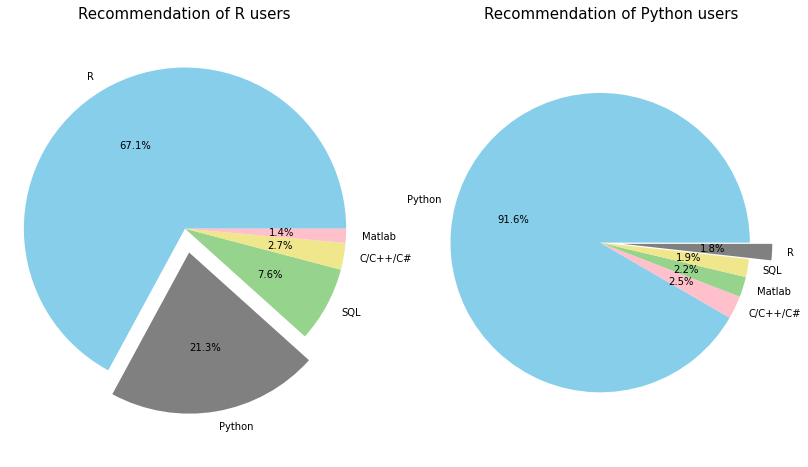

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8))

colors2 = ['skyblue', 'grey', '#96D38C', 'khaki', 'pink']
temp=R['LanguageRecommendationSelect'].value_counts()[:5]
labels = temp.index
sizes = temp.values

ax1.pie(sizes, labels=labels, shadow = False, autopct='%1.1f%%', 
        explode=(0, 0.15, 0, 0, 0), 
        colors = colors2)
ax1.axis('equal')
ax1.set_title('Recommendation of R users', fontsize = 15)

colors2 = ['skyblue', 'pink', '#96D38C', 'khaki', 'grey']
temp=Python['LanguageRecommendationSelect'].value_counts()[:5]
labels = temp.index
sizes = temp.values

ax2.pie(sizes, labels=labels, shadow = False, autopct='%1.1f%%', 
        explode=(0, 0,0,0,0.15),
        colors = colors2)
ax2.axis('equal')
ax2.set_title('Recommendation of Python users', fontsize = 15)
plt.show()

+ Most users recommended to that user can start with Python 91.6% while R users recommended R with a percentage of 67.1%

### Tools Used at Work By Python Users.

In [58]:
data = Python['WorkToolsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
datas = pd.Series(data_set).value_counts()[1:10].sort_values(ascending = False).to_frame()  

trace = go.Bar(
    x=datas.index,
    y=datas[0].values,
    marker=dict(
        color=datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Tools of Python Users at Work', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [59]:
#py.plot(fig, filename = 'Tools of Python Users at Work', auto_open=True)

[-'https://plotly.com/~otumanelson758/109/'-]

+ Most respondents said Jupyter notebooks, SQL Tensorflow are the most common tools used at work with Python as a programming language.

### How about Tools Used at Work with R

In [60]:
data = R['WorkToolsSelect'].str.split(',')
data_set = []
for i in data.dropna():
    data_set.extend(i)
datas = pd.Series(data_set).value_counts()[1:10].sort_values(ascending = False).to_frame()  

as_list = datas.index.tolist()
idx = as_list.index('Microsoft Excel Data Mining')
as_list[idx] = 'Excel Data Mining'
datas.index = as_list

trace = go.Bar(
    x=datas.index,
    y=datas[0].values,
    marker=dict(
        color=datas[0],
        colorscale = 'Jet',
        reversescale = True)
)

data = [trace]
layout = go.Layout(
    title='Tools of R Users at Work', yaxis = dict(title = '# of Respondents')
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


**Therefore the tools of R users at work inlcude the the below top 3**
+ SQL
+ Tableau
+ Excel Data Mining